In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('fivethirtyeight')

# Preprocess Data

In [2]:
path = r'/Users/cjp/Downloads/1-s2.0-S2352340921003425-mmc1 (1).xlsx'

df = pd.read_excel(path)

col_dict = {'Coconut milk type':'milk_type', 
            'Add water (%)':'per_water'} 

df = df.rename(col_dict, axis = 1).drop(columns = 'milk_type')
df.head()

,per_water,2501.423279203432,2502.711344870713,2504.00073712974,2505.2914592862703,2506.583512770582,2507.876899643553,2509.1716219703194,2510.4676811900376,2511.7650806362253,...,3970.805090770349,3974.051865489988,3977.303954080397,3980.561368013282,3983.824123554022,3987.0922322627057,3990.3657073244785,3993.6445619678193,3996.9288078671802,4000.2184615307087
0,0,0.005486,0.005619,0.005792,0.005907,0.005855,0.005739,0.005751,0.005769,0.005675,...,0.008035,0.008060,0.008072,0.008051,0.008066,0.008138,0.008206,0.008223,0.008216,0.008220
1,10,0.005268,0.005336,0.005433,0.005553,0.005622,0.005578,0.005510,0.005465,0.005410,...,0.008122,0.008178,0.008206,0.008176,0.008185,0.008263,0.008317,0.008306,0.008290,0.008309
2,20,0.003818,0.003871,0.003970,0.003941,0.003813,0.003760,0.003865,0.003991,0.003988,...,0.007536,0.007510,0.007538,0.007611,0.007694,0.007761,0.007805,0.007842,0.007865,0.007870
3,0,0.004230,0.004259,0.004331,0.004333,0.004286,0.004371,0.004512,0.004471,0.004359,...,0.008424,0.008435,0.008431,0.008433,0.008470,0.008535,0.008568,0.008545,0.008537,0.008580
4,10,0.004915,0.004999,0.005052,0.005022,0.004952,0.004958,0.004994,0.004948,0.004917,...,0.007867,0.007892,0.007893,0.007894,0.007918,0.007951,0.007967,0.007982,0.008014,0.008047


In [3]:
df.shape

(42, 730)

<AxesSubplot: >

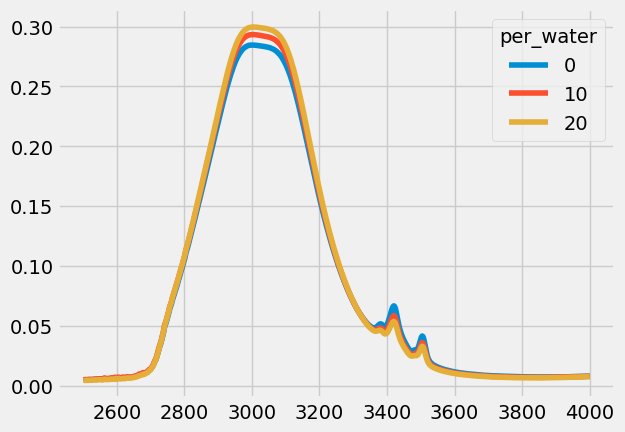

In [4]:
df.groupby('per_water').mean().T.plot()

# Build Regression Model

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR

In [6]:
X = df.select_dtypes(float)
y = df.per_water

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.3, random_state=500)

In [9]:
clf = Pipeline([
    ('ss', StandardScaler()),
    ('svr', SVR())
])
clf.fit(X_train, y_train)

Pipeline(steps=[('ss', StandardScaler()), ('svr', SVR())])

In [10]:
clf.score(X_train, y_train)

0.21362533541163442

In [11]:
param_grid = {
    'svr__kernel': ['linear', 'poly', 'rbf'],
    'svr__degree': [1,2,3,4], 
    'ss__with_mean': [True, False]
}

grid = GridSearchCV(clf, param_grid, cv = 5)
grid

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('svr', SVR())]),
             param_grid={'ss__with_mean': [True, False],
                         'svr__degree': [1, 2, 3, 4],
                         'svr__kernel': ['linear', 'poly', 'rbf']})

In [12]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('svr', SVR())]),
             param_grid={'ss__with_mean': [True, False],
                         'svr__degree': [1, 2, 3, 4],
                         'svr__kernel': ['linear', 'poly', 'rbf']})

In [13]:
grid.best_estimator_

Pipeline(steps=[('ss', StandardScaler(with_mean=False)),
                ('svr', SVR(degree=1, kernel='linear'))])

In [14]:
grid.score(X_train, y_train)

0.9796878672820643

In [15]:
grid.score(X_val,y_val)

0.8468377620749269

In [16]:
clf.score(X_val,y_val)

0.08388520109184028